## RAG Using LangChain

**Retrieval-Augmented Generation (RAG)** is an advanced technique that combines information retrieval with language generation. In RAG, a model first retrieves relevant documents from a knowledge base and then uses these documents as additional context to generate more informed and accurate responses. This approach is especially valuable for tasks that demand precise, up-to-date, or domain-specific information, such as answering complex questions, summarizing documents, or generating content based on specific topics.

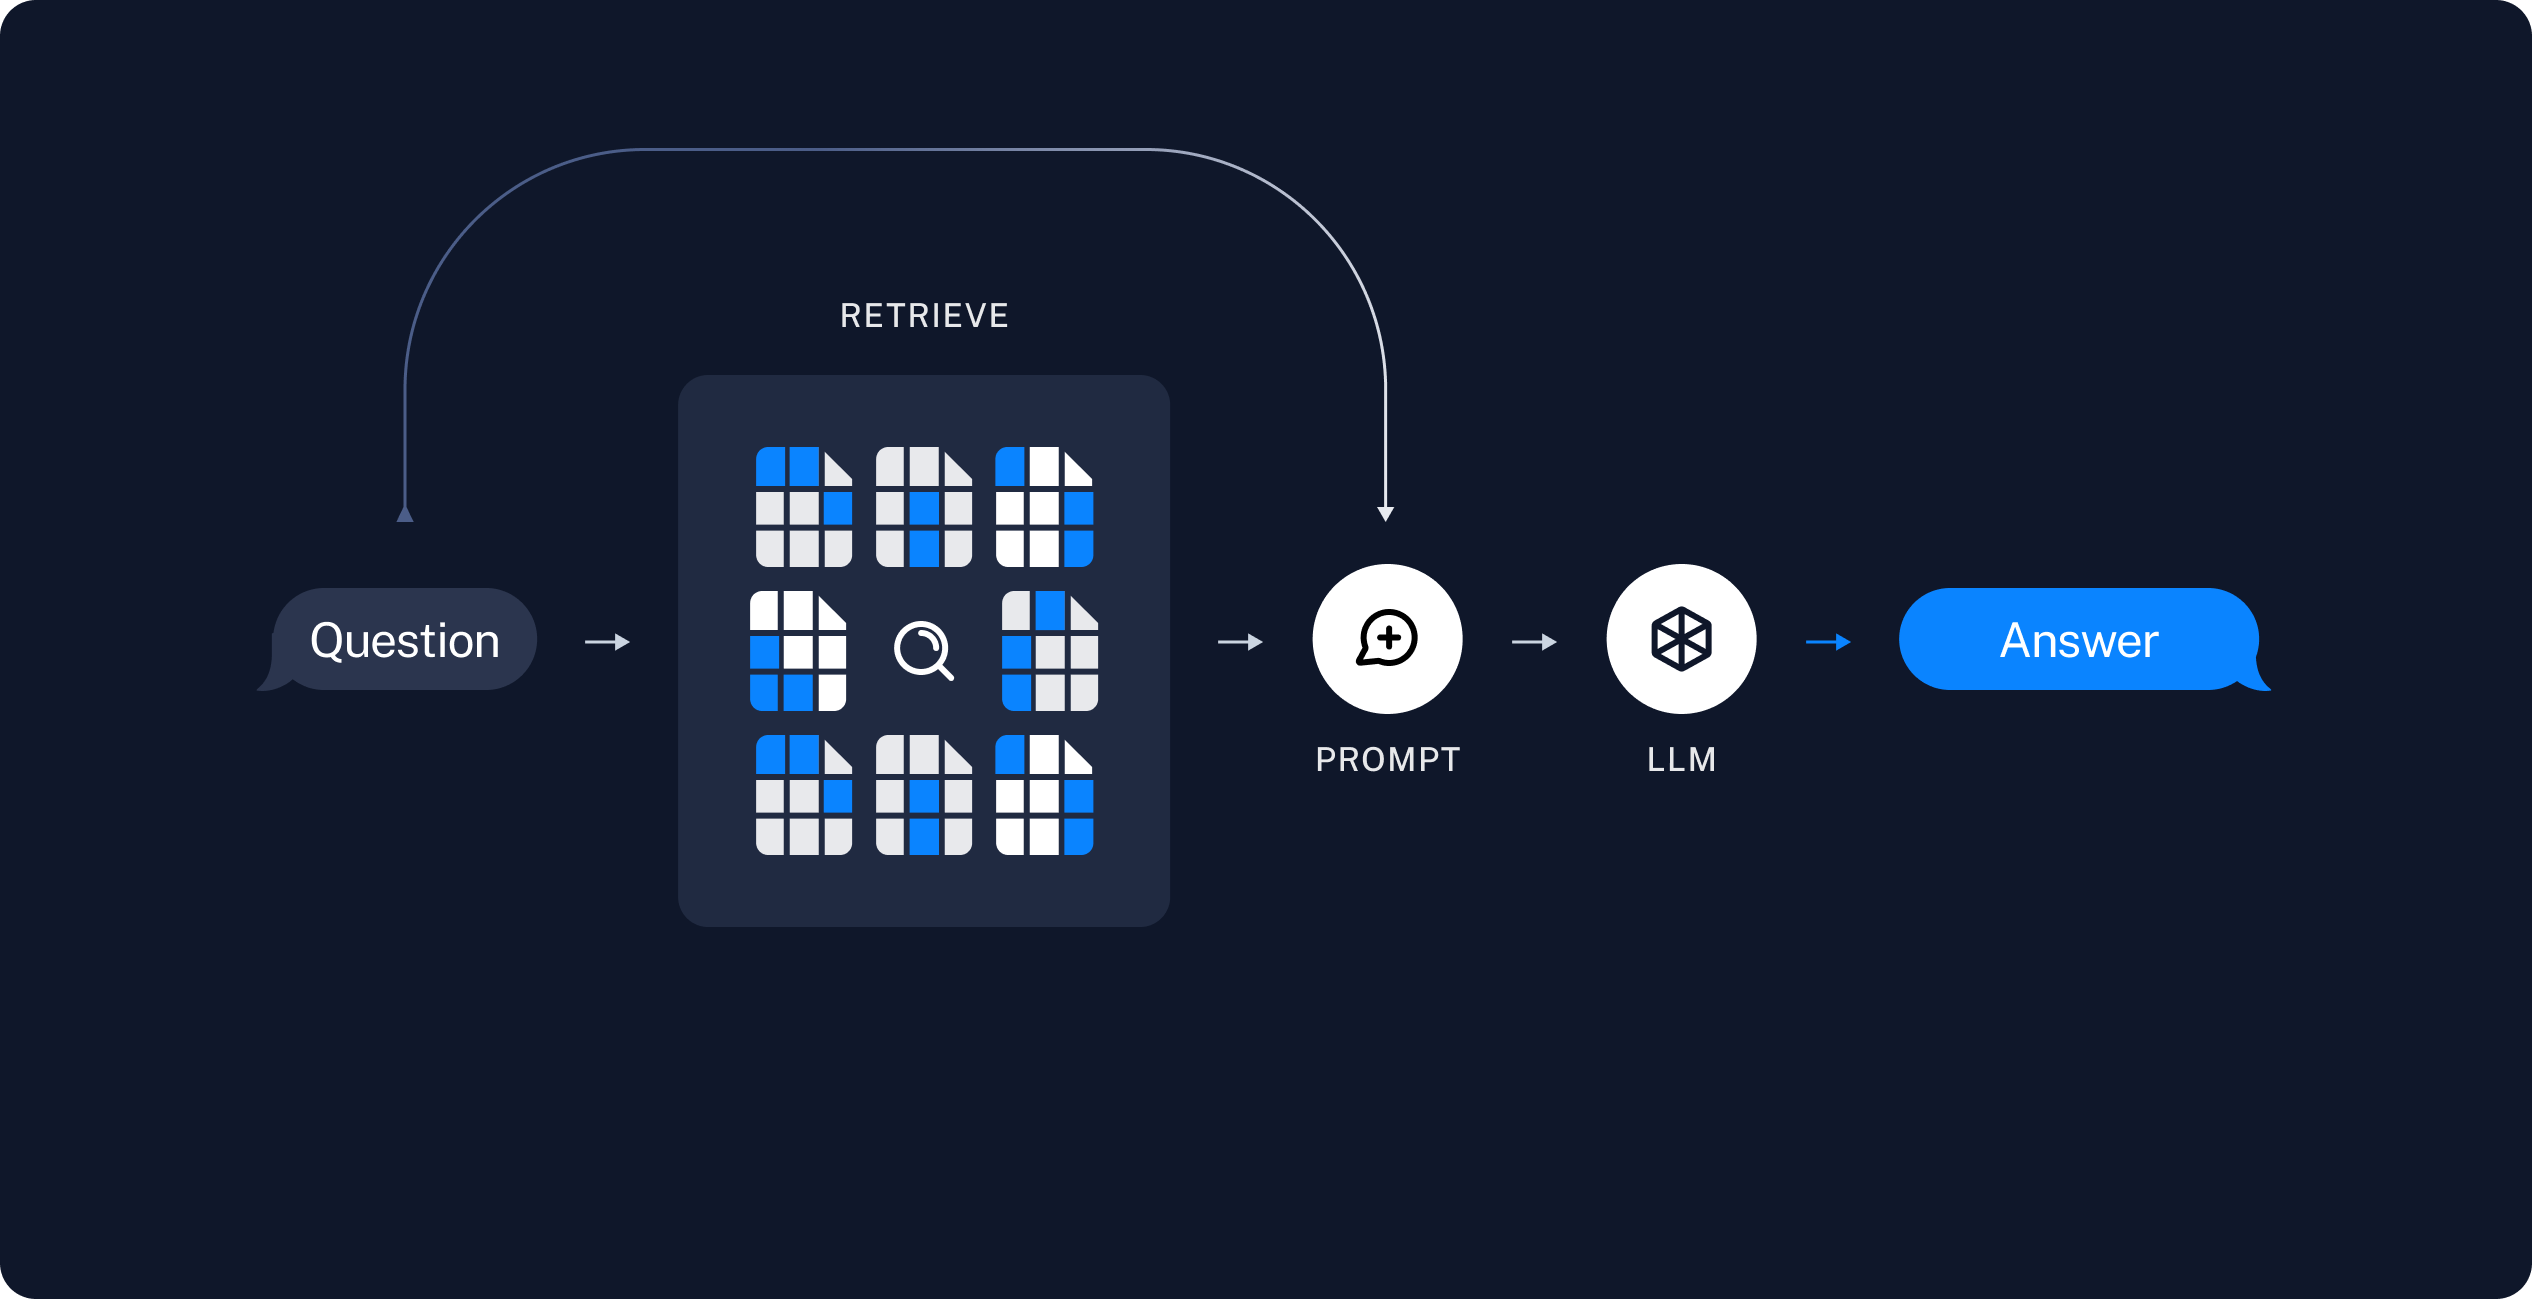

**Key benefits of RAG:**
*   **Higher accuracy**: By incorporating information from a large and potentially up-to-date knowledge base, RAG models can generate more accurate and relevant responses than models relying solely on pre-trained knowledge.
*   **Deeper context understanding**: RAG leverages retrieved documents as context, enabling the model to better grasp the nuances and specifics of a question or topic.
*   **Scalability and efficiency**: RAG can efficiently process and synthesize information from vast collections of documents, making it suitable for applications where rapid access to large-scale knowledge is required.
*   **Enhanced privacy**: RAG systems can be deployed locally, allowing organizations to use proprietary or sensitive data as context without exposing it to external cloud services.
*   **Domain adaptability**: RAG can be fine-tuned or configured to retrieve from specialized knowledge bases, making it highly adaptable to different industries or use cases.
*   **Improved transparency**: By surfacing the retrieved documents used to generate a response, RAG provides greater explainability and traceability for its outputs, helping users understand the sources behind each answer.

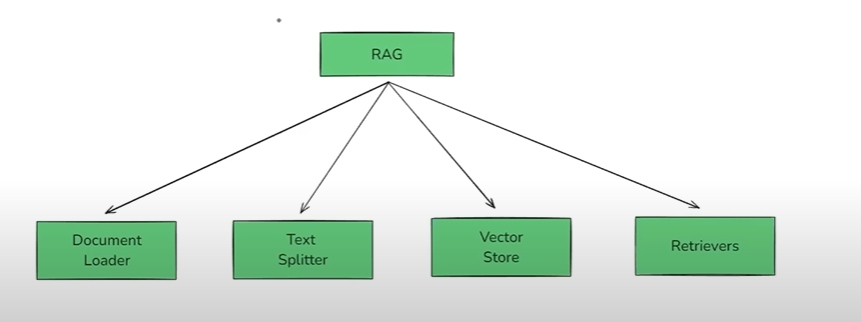

### Document Loaders

**Document Loaders** are component in LangChain used to load data from various sources into a standardized format(usually as Document object). Which can be used for chunking, embedding, retrieval, and generation.



In [5]:
# TextLoader
# Commonly used document loader in LangChain that reads plain text files and converts them into LangChain Document objects.
# Ideal for loading chat logs, scrapped text, transcripts, or code snippets.

# %pip install langchain_community

from langchain_community.document_loaders import TextLoader

loader = TextLoader("cricket.txt", encoding="utf-8")
documents = loader.load()

print(documents)

[Document(metadata={'source': 'cricket.txt'}, page_content='Beneath the sun or floodlight\'s gleam,\n\nCricket lives like a waking dream.\n\nA field of green, a willowed sound,\n\nWhere legends rise and tales are found.\n\nFrom dusty lanes where barefoot boys,\n\nChase every run with shrieks of joy,\n\nTo packed arenas roaring loud,\n\nThe game unites a global crowd.\n\nA coin is tossed, the captains stare,\n\nAs tension thickens in the air.\n\nBat or bowl? A choice so bold,\n\nA story new begins, retold.\n\nThe openers walk, calm yet brave,\n\nEach stride a wave upon the wave.\n\nThey face the ball with narrowed eyes,\n\nAs silence grips the watching skies.\n\nThe bowler runs, a rhythmic beat,\n\nLike thunder galloping on feet.\n\nA leather flash, a wooden crack—\n\nThe ball takes flight, then tumbles back.\n\nA flick through square, a drive through mid,\n\nA lofted shot the fielder missed.\n\nA single, double, sprint for three,\n\nThe crowd erupts in ecstasy.\n\nBut not for long—the 

In [10]:
print(type(documents))
print(len(documents))
print(documents[0].page_content)
print(documents[0].metadata)
print(type(documents[0]))

<class 'list'>
1
Beneath the sun or floodlight's gleam,

Cricket lives like a waking dream.

A field of green, a willowed sound,

Where legends rise and tales are found.

From dusty lanes where barefoot boys,

Chase every run with shrieks of joy,

To packed arenas roaring loud,

The game unites a global crowd.

A coin is tossed, the captains stare,

As tension thickens in the air.

Bat or bowl? A choice so bold,

A story new begins, retold.

The openers walk, calm yet brave,

Each stride a wave upon the wave.

They face the ball with narrowed eyes,

As silence grips the watching skies.

The bowler runs, a rhythmic beat,

Like thunder galloping on feet.

A leather flash, a wooden crack—

The ball takes flight, then tumbles back.

A flick through square, a drive through mid,

A lofted shot the fielder missed.

A single, double, sprint for three,

The crowd erupts in ecstasy.

But not for long—the trap is set,

The spinner loops, the pitch is wet.

A sudden turn, the bat’s deceived,

And 

In [2]:
# %pip install --upgrade langchain-core langchain-community langchain-openai

from langchain_openai import ChatOpenAI
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import PromptTemplate
from langchain_community.document_loaders import TextLoader
# Using LangChain to summarize text from a file using OpenAI's ChatGPT model

from dotenv import load_dotenv
load_dotenv()

model = ChatOpenAI()

prompt = PromptTemplate(
    input_variables=["text"],
    template="Summarize the following text:\n{text}",
)

parser = StrOutputParser()

loader = TextLoader("cricket.txt", encoding="utf-8")
documents = loader.load()

# print(documents)

chain = prompt | model | parser
try:
    summary = chain.invoke({"text": documents[0].page_content})
    print(summary)
except Exception as e:
    print(f"An error occurred: {e}")


The text describes the beauty and excitement of the game of cricket, highlighting the emotions and moments that make it special. From the anticipation at the start of a match, to the thrill of batting and bowling, to the camaraderie and sportsmanship shared among players and fans, cricket is portrayed as a timeless and cherished sport that brings people together. The text encapsulates the essence of cricket as more than just a game, but a source of passion, unity, and unforgettable memories.


In [6]:
# PyPDFLoader
# It is used to load content from PDF files and convert each page into a LangChain Document object.
# It's mostly useful for textual data

# %pip install pypdf

from langchain_community.document_loaders import PyPDFLoader

pdf_loader = PyPDFLoader("Offer_letter.pdf")
documents = pdf_loader.load()

# print(documents)
print(type(documents))
print(len(documents))
print(documents[0].page_content)



<class 'list'>
15
All rights reserved. AT&T, the AT&T logo and all other  AT&T marks contained herein a re trademarks of AT&T 
Intellectual Property and/or AT&T affiliated companies. 
 
AT&T Communication 
Services India Pvt. Ltd. 
13th Floor, Mohan Dev 
House 13 Tolstoy Marg, 
New Delhi 110001, India 
 
CIN: U64203DL1996PTO78375 
                                
Tel:  91.80.43546000 
Fax: 91.80.41649560 
        91.80.41649561 
www.ap.att.com 
 
 
May 24, 2023 
 
Bibek Rauth 
Hakimpara PWD Qtr., Near PWD Canteen,  
Netaji Subhash Chandra Bose Road, 
Jalpaiguri, West Bengal, India - 735101 
 
Sub: Appointment 
 
Dear Bibek, 
 
We, AT&T Communication Services India Pvt. Ltd.  are pleased to appoint you to the 
position of Specialist, Data Scientist  (subject to a satisfactory completion of the background 
check), in the Chief Data Office BU  division, effective from the date you join, which shall not 
be later than June 5, 2023. You will be reporting for work in Bangalore and such other

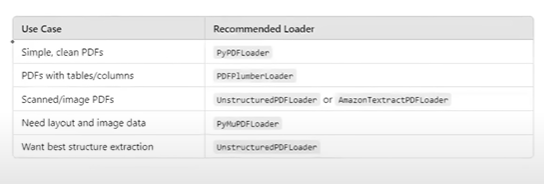

In [8]:
# DirectoryLoader
# It is used to load documents from a directory, allowing you to specify the file types to include.
# It can be used to load multiple files at once, making it useful for batch processing of documents.
from langchain_community.document_loaders import DirectoryLoader, PyPDFLoader

# D:\books_and_papers\books\Quick Start LLM
directory_loader = DirectoryLoader(
    "D:\\books_and_papers\\books\\Quick Start LLM",
    glob="*.pdf",  # Load all text files in the directory and subdirectories
    show_progress=True,
    loader_cls=PyPDFLoader  # Use PyPDFLoader to load PDF files
)

documents = directory_loader.load()

print(type(documents))
print(len(documents))
print(documents[0].page_content)
# Print metadata of the first document
print(documents[0].metadata)
# Print the number of documents loaded  
print(f"Number of documents loaded: {len(documents)}")

100%|██████████| 12/12 [00:02<00:00,  4.33it/s]

<class 'list'>
259
1
Overview of Large Language Models
In 2017, a team at Google Brain introduced an advanced artificial intelli-
gence (AI) deep learning model called the Transformer. Since then, the
Transformer has become the standard for tackling various natural lan-
guage processing (NLP) tasks in academia and industry. It is likely that
you have interacted with the Transformer model in recent years without
even realizing it, as Google uses BERT to enhance its search engine by bet-
ter understanding users’ search queries. The GPT family of models from
OpenAI have also received attention for their ability to generate human-
like text and images.
These Transformers now power applications such as GitHub’s Copilot (de-
veloped by OpenAI in collaboration with Microsoft), which can convert
comments and snippets of code into fully functioning source code that
can even call upon other large language models (LLMs) (as in Listing 1.1)
to perform NLP tasks.
Listing 1.1 Using the Copilot LLM t

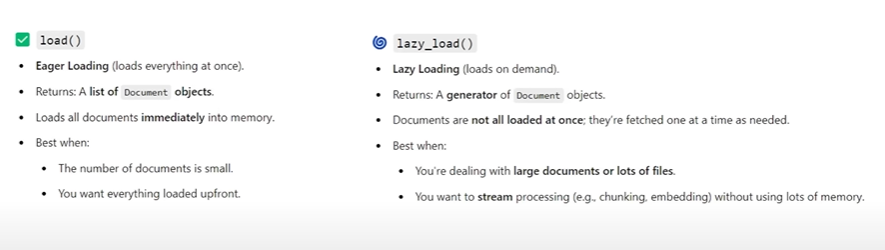

In [ ]:
# WebBasedLoader
# It is used to load content from web pages, allowing you to specify the URL of the page to load.
# Internally it uses the `requests` and `BeautifulSoup` library to fetch the content of the web page and then converts it into a LangChain Document object.

# Limitations:
# It may not work with all web pages, especially those that require JavaScript to render content.
# We use SeleniumURLLoader for more complex web scraping tasks.

# %pip install bs4 requests


from langchain_community.document_loaders import WebBaseLoader
# Example URL
url = "https://en.wikipedia.org/wiki/Cricket"
# Load the content of the web page
# If you want to load multiple URLs, you can pass a list of URLs to the WebBaseLoader
web_loader = WebBaseLoader(url)
documents = web_loader.load()
# Print the loaded documents
# print(documents)
print(type(documents))
print(len(documents))
print(documents[0].page_content)

<class 'list'>
1




Cricket - Wikipedia


































Jump to content







Main menu





Main menu
move to sidebar
hide



		Navigation
	


Main pageContentsCurrent eventsRandom articleAbout WikipediaContact us





		Contribute
	


HelpLearn to editCommunity portalRecent changesUpload fileSpecial pages



















Search











Search






















Appearance
















Donate

Create account

Log in








Personal tools





Donate Create account Log in





		Pages for logged out editors learn more



ContributionsTalk




























Contents
move to sidebar
hide




(Top)





1
History




Toggle History subsection





1.1
Origins








1.2
Growth of amateur and professional cricket in England








1.3
English cricket in the 18th and 19th centuries








1.4
Cricket becomes an international sport








1.5
Cricket in the 20th century








1.6
Cricket in the 21st century










2
Laws and gameplay




To

In [13]:
# CSVLoader
# It is used to load content from CSV files and convert each row into a LangChain Document object.  

from langchain_community.document_loaders import CSVLoader
# Example CSV file

loader = CSVLoader("example.csv", encoding="utf-8")

documents = loader.load()

# Print the loaded documents
print(type(documents))
print(len(documents))
print(documents[0].page_content)
print(documents[0].metadata)


<class 'list'>
30
id: 1
text: "This is the first row"
{'source': 'example.csv', 'row': 0}


### Text Splitting

Document splitting is often a crucial preprocessing step for many applications. It involves breaking down large texts into smaller, manageable chunks. This process offers several benefits, such as ensuring consistent processing of varying document lengths, overcoming input size limitations of models, and improving the quality of text representations used in retrieval systems. There are several strategies for splitting documents, each with its own advantages.

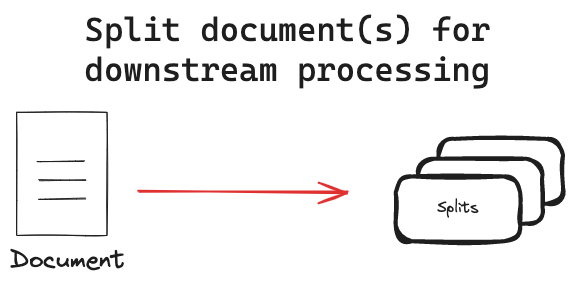

This is crucial for several reasons:

- **Memory Efficiency**: Large texts can consume a significant amount of memory, which can lead to performance
- **Computational Efficiency**: Processing large texts at once can be computationally expensive, slowing down th
- **Improved Accuracy**: Smaller chunks of text can be processed more accurately, as the model is not overwhelmed by the sheer volume of data.
- **Better Handling of Context**: Smaller chunks allow the model to better handle context, as it can focus on a specific section of the text without being distracted by the rest.
- **Enhanced Interpretability**: Smaller chunks make it easier to understand how the model is making predictions, as the output is more focused on a specific section of the text.
- **Improved Downstream tasks**: Text Splitting improves nearly every LLM powered task

    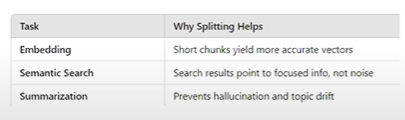





#### Length Based Text Splitting

The most intuitive strategy is to split documents based on their length. This simple yet effective approach ensures that each chunk doesn't exceed a specified size limit. Key benefits of length-based splitting:

 - Straightforward implementation
 - Consistent chunk sizes
 - Easily adaptable to different model requirements

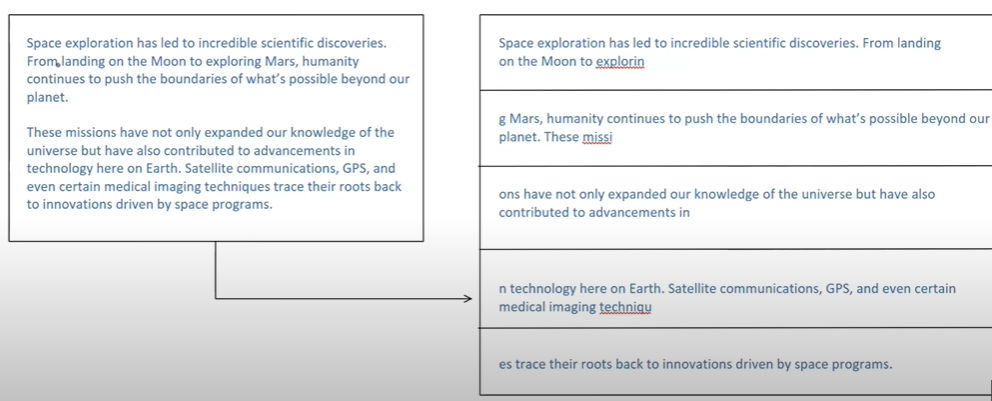

In [27]:
from langchain.text_splitter import CharacterTextSplitter

# Split the text into smaller chunks
text = "This is a sample text to be split into smaller chunks. " * 10
text_splitter = CharacterTextSplitter(
    chunk_size=50,  # Maximum size of each chunk
    chunk_overlap=2,  # Overlap between chunks
    separator="."  # Separator to use for splitting
)

# Split the text into chunks
chunks = text_splitter.split_text(text)

# print(text)
# Print the number of chunks created
print(f"Number of chunks created: {len(chunks)}")
# Print the chunks
for i, chunk in enumerate(chunks):
    print(f"Chunk {i + 1}: {chunk}\n")


Created a chunk of size 53, which is longer than the specified 50
Created a chunk of size 54, which is longer than the specified 50
Created a chunk of size 54, which is longer than the specified 50
Created a chunk of size 54, which is longer than the specified 50
Created a chunk of size 54, which is longer than the specified 50
Created a chunk of size 54, which is longer than the specified 50
Created a chunk of size 54, which is longer than the specified 50
Created a chunk of size 54, which is longer than the specified 50
Created a chunk of size 54, which is longer than the specified 50
Created a chunk of size 54, which is longer than the specified 50


Number of chunks created: 10
Chunk 1: This is a sample text to be split into smaller chunks

Chunk 2: This is a sample text to be split into smaller chunks

Chunk 3: This is a sample text to be split into smaller chunks

Chunk 4: This is a sample text to be split into smaller chunks

Chunk 5: This is a sample text to be split into smaller chunks

Chunk 6: This is a sample text to be split into smaller chunks

Chunk 7: This is a sample text to be split into smaller chunks

Chunk 8: This is a sample text to be split into smaller chunks

Chunk 9: This is a sample text to be split into smaller chunks

Chunk 10: This is a sample text to be split into smaller chunks



In [28]:
from langchain.text_splitter import CharacterTextSplitter
from langchain_community.document_loaders import PyPDFLoader

pdf_loader = PyPDFLoader("Offer_letter.pdf")
documents = pdf_loader.load()

text_splitter = CharacterTextSplitter(
    chunk_size=100,  # Maximum size of each chunk
    chunk_overlap=2,  # Overlap between chunks
    separator=''  # Separator to use for splitting
)

# Split the text into chunks
chunks = text_splitter.split_documents(documents=documents)

# print(text)
# Print the number of chunks created
print(f"Number of chunks created: {len(chunks)}")
# Print the chunks
for i, chunk in enumerate(chunks):
    print(f"Chunk {i + 1}: {chunk}\n")

Number of chunks created: 503
Chunk 1: page_content='All rights reserved. AT&T, the AT&T logo and all other  AT&T marks contained herein a re trademarks' metadata={'producer': 'Microsoft® Word for Microsoft 365', 'creator': 'Microsoft® Word for Microsoft 365', 'creationdate': '2023-05-24T12:30:46+05:30', 'title': 'AT&T Proprietary (Restricted)', 'author': 'HRSD India', 'moddate': '2023-05-24T12:30:46+05:30', 'source': 'Offer_letter.pdf', 'total_pages': 15, 'page': 0, 'page_label': '1'}

Chunk 2: page_content='s of AT&T 
Intellectual Property and/or AT&T affiliated companies. 
 
AT&T Communication 
Services I' metadata={'producer': 'Microsoft® Word for Microsoft 365', 'creator': 'Microsoft® Word for Microsoft 365', 'creationdate': '2023-05-24T12:30:46+05:30', 'title': 'AT&T Proprietary (Restricted)', 'author': 'HRSD India', 'moddate': '2023-05-24T12:30:46+05:30', 'source': 'Offer_letter.pdf', 'total_pages': 15, 'page': 0, 'page_label': '1'}

Chunk 3: page_content='India Pvt. Ltd. 
13th 

#### Text-Structure Based

Text is naturally organized into hierarchical units such as paragraphs, sentences, and words. We can leverage this inherent structure to inform our splitting strategy, creating split that maintain natural language flow, maintain semantic coherence within split, and adapts to varying levels of text granularity. LangChain's RecursiveCharacterTextSplitter implements this concept:

 - The RecursiveCharacterTextSplitter attempts to keep larger units (e.g., paragraphs) intact.
 - If a unit exceeds the chunk size, it moves to the next level (e.g., sentences).
 - This process continues down to the word level if necessary.

In [33]:
from langchain.text_splitter import RecursiveCharacterTextSplitter

text = """ My name is John Doe. I am a software engineer with over 10 years of experience in the industry. 
        I have worked on various projects, including web development, mobile app development, and data analysis. 
        I am passionate about technology and love to learn new things. In my free time, 
        I enjoy reading books, playing video games, and spending time with my family and friends. """

# Initialize the RecursiveCharacterTextSplitter
text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=40,  # Maximum size of each chunk
    chunk_overlap=2,  # Overlap between chunks
    separators=["\n\n", "\n", " ", ""]  # List of separators to use for splitting
)

# Split the text into chunks
chunks = text_splitter.split_text(text)

# Print the number of chunks created
print(f"Number of chunks created: {len(chunks)}")

# Print the chunks 
for i, chunk in enumerate(chunks):
    print(f"Chunk {i + 1} with length {len(chunk)}: {chunk}\n")


Number of chunks created: 13
Chunk 1 with length 36: My name is John Doe. I am a software

Chunk 2 with length 30: engineer with over 10 years of

Chunk 3 with length 27: experience in the industry.

Chunk 4 with length 24: I have worked on various

Chunk 5 with length 36: projects, including web development,

Chunk 6 with length 32: mobile app development, and data

Chunk 7 with length 9: analysis.

Chunk 8 with length 21: I am passionate about

Chunk 9 with length 32: technology and love to learn new

Chunk 10 with length 24: things. In my free time,

Chunk 11 with length 30: I enjoy reading books, playing

Chunk 12 with length 38: video games, and spending time with my

Chunk 13 with length 19: family and friends.



#### Document-Structured Based

Some documents have an inherent structure, such as HTML, Markdown, or JSON files. In these cases, it's beneficial to split the document based on its structure, as it often naturally groups semantically related text. Key benefits of structure-based splitting:

- Preserves the logical organization of the document
- Maintains context within each chunk
- Can be more effective for downstream tasks like retrieval or summarization

Examples of structure-based splitting:

- Markdown: Split based on headers (e.g., #, ##, ###)
- HTML: Split using tags
- JSON: Split by object or array elements
Code: Split by functions, classes, or logical blocks

In [40]:
from langchain_text_splitters import RecursiveCharacterTextSplitter, Language

text = """ ### Text Splitting

Text splitting is the process of breaking down a large text into smaller, more manageable chunks that an LLM can handle effectively. 

This is crucial for several reasons:

- **Memory Efficiency**: Large texts can consume a significant amount of memory, which can lead to performance
- **Computational Efficiency**: Processing large texts at once can be computationally expensive, slowing down th
- **Improved Accuracy**: Smaller chunks of text can be processed more accurately, as the model is not overwhelmed by the sheer volume of data.
- **Better Handling of Context**: Smaller chunks allow the model to better handle context, as it can focus on a specific section of the text without being distracted by the rest.
- **Enhanced Interpretability**: Smaller chunks make it easier to understand how the model is making predictions, as the output is more focused on a specific section of the text.
- **Improved Downstream tasks**: Text Splitting improves nearly every LLM powered task. """

# Initialize the RecursiveCharacterTextSplitter
# Note the changes in the import and the use of the Language enum
splitter = RecursiveCharacterTextSplitter.from_language(
    language=Language.MARKDOWN,  # Use the Language enum
    chunk_size=100,              # Maximum size of each chunk
    chunk_overlap=20             # Increased overlap for better context
)

# Split the text into chunks
chunks = splitter.split_text(text)

# Print the number of chunks created
print(f"Number of chunks created: {len(chunks)}")
print("-" * 30)

# Print the chunks
for i, chunk in enumerate(chunks):
    print(f"Chunk {i + 1} with length {len(chunk)}:\n'{chunk}'\n")

Number of chunks created: 16
------------------------------
Chunk 1 with length 18:
'### Text Splitting'

Chunk 2 with length 96:
'Text splitting is the process of breaking down a large text into smaller, more manageable chunks'

Chunk 3 with length 53:
'manageable chunks that an LLM can handle effectively.'

Chunk 4 with length 36:
'This is crucial for several reasons:'

Chunk 5 with length 98:
'- **Memory Efficiency**: Large texts can consume a significant amount of memory, which can lead to'

Chunk 6 with length 29:
'which can lead to performance'

Chunk 7 with length 96:
'- **Computational Efficiency**: Processing large texts at once can be computationally expensive,'

Chunk 8 with length 26:
'expensive, slowing down th'

Chunk 9 with length 97:
'- **Improved Accuracy**: Smaller chunks of text can be processed more accurately, as the model is'

Chunk 10 with length 60:
'as the model is not overwhelmed by the sheer volume of data.'

Chunk 11 with length 96:
'- **Better Handling of C

#### Semantic Meaning Based


Unlike the previous methods, semantic-based splitting actually considers the content of the text. While other approaches use document or text structure as proxies for semantic meaning, this method directly analyzes the text's semantics. There are several ways to implement this, but conceptually the approach is split text when there are significant changes in text meaning. As an example, we can use a sliding window approach to generate embeddings, and compare the embeddings to find significant differences:

- Start with the first few sentences and generate an embedding.
- Move to the next group of sentences and generate another embedding (e.g., using a sliding window approach).
- Compare the embeddings to find significant differences, which indicate potential "break points" between semantic sections.

This technique helps create chunks that are more semantically coherent, potentially improving the quality of downstream tasks like retrieval or summarizati

In [47]:
# %pip install langchain-experimental

from langchain_experimental.text_splitter import SemanticChunker
from langchain_openai.embeddings import OpenAIEmbeddings
from dotenv import load_dotenv

load_dotenv()

text_splitter = SemanticChunker(
    embeddings=OpenAIEmbeddings(),
    breakpoint_threshold_type="standard_deviation",  # Use standard deviation for breakpoint threshold
    breakpoint_threshold_amount=1,  # Set a threshold for breaking points
)

sample = """
Farmers were working hard in the fields, preparing the soil and planting seeds for the next season. 
The sun was bright, and the air smelled of earth and fresh grass. 
The Indian Premier League (IPL) is the biggest cricket league in the world. 
People all over the world watch the matches and cheer for their favourite teams.


Terrorism is a big danger to peace and safety. It causes harm to people and creates fear in cities and villages. 
When such attacks happen, they leave behind pain and sadness. 
To fight terrorism, we need strong laws, alert security forces, and support from people who care about peace and safety.
"""

print(f"Number of chunks created: {len(chunks)}")
print("-" * 30)

# Print the chunks
for i, chunk in enumerate(chunks):
    print(f"Chunk {i + 1} with length {len(chunk)}:\n'{chunk}'\n")

Number of chunks created: 3
------------------------------
Chunk 1 with length 100:
'
Farmers were working hard in the fields, preparing the soil and planting seeds for the next season.'

Chunk 2 with length 222:
'The sun was bright, and the air smelled of earth and fresh grass. The Indian Premier League (IPL) is the biggest cricket league in the world. People all over the world watch the matches and cheer for their favourite teams.'

Chunk 3 with length 296:
'Terrorism is a big danger to peace and safety. It causes harm to people and creates fear in cities and villages. When such attacks happen, they leave behind pain and sadness. To fight terrorism, we need strong laws, alert security forces, and support from people who care about peace and safety. '



### Vector Stores

A vectore store is a system designed to store and retrieve data represented as numerical vectors.

Key Features:
 1. **Storage**: Ensures that vectors and their associated metadata are retained, whether *in-memory* for quick lookups or *on-disk* for durability and large-scale use.
 2. **Similarity Search**: Helps to retrieve the vectors that are most similar to a query vector. This is particularly useful in applications like recommendation systems, where you want to find items that are similar to a user's preferences.
 3. **Indexing**: Provides an efficient way to store and retrieve vectors, making it suitable for high-dimensional data. This is crucial in many applications, such as image and text analysis, where data often has a large number of features.
 4. **Scalability**: Designed to handle large datasets and scale horizontally, making it suitable for big data applications.
 5. **CRUD Operations**: Supports basic create, read, update, and delete operations for vectors and their metadata.

Use Cases:
- **Recommendation Systems**: Use the vector store to store user preferences and item features, then us similarity search to recommend items to users.
- **Image and Text Analysis**: Store image and text features in the vector store and use similarity search to find similar images or text.
- **Semantic Search**: Use the vector store to store semantic data and use similarity search to find related concepts.
- **RAG**: Use the vector store to store RAG (Relation, Attribute, Group) data and use similarity search to find related RAGs.



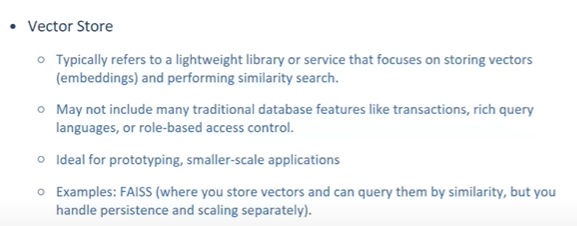

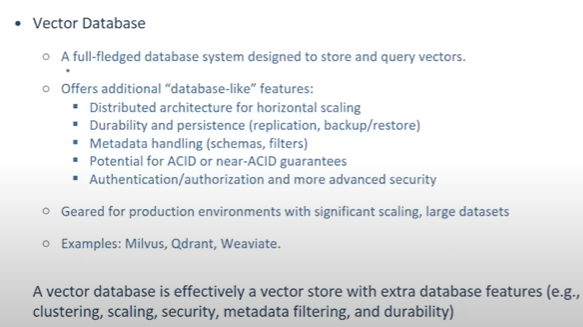


**Vectore Stores in LangChain**

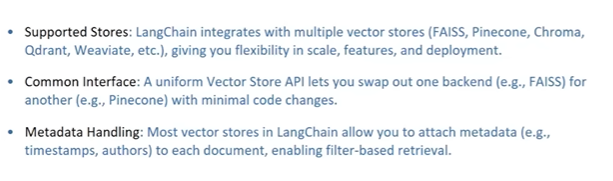

#### Chroma Vector Store

Chroma is lightweight, open-source vector database that is especially good for local developement and small-to-medium scale production needs. 

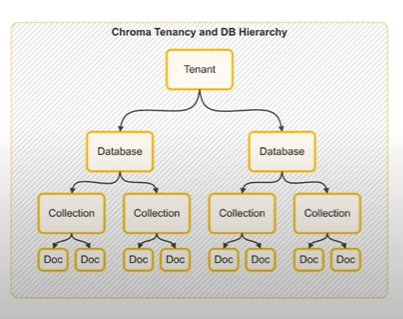



In [ ]:
# Document Embedding using Chroma with LangChain
# ===============================================

# %pip install langchain chromadb openai tiktoken pypdf langchain_openai langchain-community

from langchain_openai import OpenAIEmbeddings
from langchain.vectorstores import Chroma
from langchain.schema import Document


In [51]:
# Create LangChain documents for IPL players

doc1 = Document(
        page_content="Virat Kohli is one of the most successful and consistent batsmen in IPL history. Known for his aggressive batting style and fitness, he has led the Royal Challengers Bangalore in multiple seasons.",
        metadata={"team": "Royal Challengers Bangalore"}
    )
doc2 = Document(
        page_content="Rohit Sharma is the most successful captain in IPL history, leading Mumbai Indians to five titles. He's known for his calm demeanor and ability to play big innings under pressure.",
        metadata={"team": "Mumbai Indians"}
    )
doc3 = Document(
        page_content="MS Dhoni, famously known as Captain Cool, has led Chennai Super Kings to multiple IPL titles. His finishing skills, wicketkeeping, and leadership are legendary.",
        metadata={"team": "Chennai Super Kings"}
    )
doc4 = Document(
        page_content="Jasprit Bumrah is considered one of the best fast bowlers in T20 cricket. Playing for Mumbai Indians, he is known for his yorkers and death-over expertise.",
        metadata={"team": "Mumbai Indians"}
    )
doc5 = Document(
        page_content="Ravindra Jadeja is a dynamic all-rounder who contributes with both bat and ball. Representing Chennai Super Kings, his quick fielding and match-winning performances make him a key player.",
        metadata={"team": "Chennai Super Kings"}
    )

documents = [doc1, doc2, doc3, doc4, doc5]


In [ ]:
# Create a vector store using Chroma to store the IPL players' documents
vectorestore = Chroma(
    embedding_function=OpenAIEmbeddings(),
    collection_name="ipl_players",
    persist_directory="vectore_stores//chroma_db"  # Directory to store the vector database
)

In [54]:
# add documents to the vector store
vectorestore.add_documents(documents)

['cd1a13b4-4a03-4376-9deb-57d923a0d155',
 '87a83e68-9c60-4420-8e48-84ac09393206',
 '7387b2b3-3892-4941-95d9-5648d1cb4bf6',
 'cf777a62-d4ba-4aa2-a32a-25bcbd9f593e',
 '54f545dd-58ce-461b-9ebc-0da5c88f30d1']

In [59]:
# view documents in the vector store
print(f"Number of documents in the vector store: {len(vectorestore)}")
print("Documents in the vector store:")
print(vectorestore.get(include=['embeddings','documents', 'metadatas']))  # Get all documents in the vector store

Number of documents in the vector store: 5
Documents in the vector store:
{'ids': ['cd1a13b4-4a03-4376-9deb-57d923a0d155', '87a83e68-9c60-4420-8e48-84ac09393206', '7387b2b3-3892-4941-95d9-5648d1cb4bf6', 'cf777a62-d4ba-4aa2-a32a-25bcbd9f593e', '54f545dd-58ce-461b-9ebc-0da5c88f30d1'], 'embeddings': array([[-0.00210453, -0.00214285,  0.0268    , ..., -0.01707893,
        -0.00366616,  0.01357884],
       [-0.00268021, -0.00010323,  0.02815653, ..., -0.01501936,
         0.00590092, -0.01164922],
       [ 0.00092799, -0.00476   ,  0.0124662 , ..., -0.01731381,
         0.00075886,  0.00296567],
       [-0.02714536,  0.00885395,  0.02699314, ..., -0.02592762,
         0.00900617, -0.01999116],
       [-0.01810451,  0.01281202,  0.0347942 , ..., -0.03034012,
        -0.00595078,  0.00521716]], shape=(5, 1536)), 'documents': ['Virat Kohli is one of the most successful and consistent batsmen in IPL history. Known for his aggressive batting style and fitness, he has led the Royal Challengers Ba

In [ ]:
# Search Documents in the Vector Store with Similarity Search
query = "Who is the captain of Chennai Super Kings?"
results = vectorestore.similarity_search(query, k=2)  # Get top 2 results
print(f"Search results for query '{query}':")
for i, result in enumerate(results):
    print(f"Result {i + 1}:")
    print(f"Content: {result.page_content}")
    print(f"Metadata: {result.metadata}")
    print("-" * 30)

Search results for query 'Who is the captain of Chennai Super Kings?':
Result 1:
Content: MS Dhoni, famously known as Captain Cool, has led Chennai Super Kings to multiple IPL titles. His finishing skills, wicketkeeping, and leadership are legendary.
Metadata: {'team': 'Chennai Super Kings'}
------------------------------
Result 2:
Content: Rohit Sharma is the most successful captain in IPL history, leading Mumbai Indians to five titles. He's known for his calm demeanor and ability to play big innings under pressure.
Metadata: {'team': 'Mumbai Indians'}
------------------------------


In [ ]:
# Search for Bowlers in the Vector Store
query = "Who among these are a bowler?"
results = vectorestore.similarity_search(query, k=2)  # Get top 2 results
print(f"Search results for query '{query}':")
for i, result in enumerate(results):
    print(f"Result {i + 1}:")
    print(f"Content: {result.page_content}")
    print(f"Metadata: {result.metadata}")
    print("-" * 30)

Search results for query 'Who among these are a bowler?':
Result 1:
Content: Jasprit Bumrah is considered one of the best fast bowlers in T20 cricket. Playing for Mumbai Indians, he is known for his yorkers and death-over expertise.
Metadata: {'team': 'Mumbai Indians'}
------------------------------
Result 2:
Content: Ravindra Jadeja is a dynamic all-rounder who contributes with both bat and ball. Representing Chennai Super Kings, his quick fielding and match-winning performances make him a key player.
Metadata: {'team': 'Chennai Super Kings'}
------------------------------


In [62]:
# metadata filtering
vectorestore.similarity_search_with_score(
    query="",
    k=2,
    filter={"team": "Chennai Super Kings"}  # Filter results by team
)

[(Document(metadata={'team': 'Chennai Super Kings'}, page_content='MS Dhoni, famously known as Captain Cool, has led Chennai Super Kings to multiple IPL titles. His finishing skills, wicketkeeping, and leadership are legendary.'),
  0.6488258242607117),
 (Document(metadata={'team': 'Chennai Super Kings'}, page_content='Ravindra Jadeja is a dynamic all-rounder who contributes with both bat and ball. Representing Chennai Super Kings, his quick fielding and match-winning performances make him a key player.'),
  0.6566494703292847)]

In [63]:
# update documents
updated_doc1 = Document(
    page_content="Virat Kohli, the former captain of Royal Challengers Bangalore (RCB), is renowned for his aggressive leadership and consistent batting performances. He holds the record for the most runs in IPL history, including multiple centuries in a single season. Despite RCB not winning an IPL title under his captaincy, Kohli's passion and fitness set a benchmark for the league. His ability to chase targets and anchor innings has made him one of the most dependable players in T20 cricket.",
    metadata={"team": "Royal Challengers Bangalore"}
)

vectorestore.update_document(document_id='09a39dc6-3ba6-4ea7-927e-fdda591da5e4', document=updated_doc1)

In [64]:
print(vectorestore.get(include=['embeddings','documents', 'metadatas'])) 

{'ids': ['cd1a13b4-4a03-4376-9deb-57d923a0d155', '87a83e68-9c60-4420-8e48-84ac09393206', '7387b2b3-3892-4941-95d9-5648d1cb4bf6', 'cf777a62-d4ba-4aa2-a32a-25bcbd9f593e', '54f545dd-58ce-461b-9ebc-0da5c88f30d1'], 'embeddings': array([[-0.00210453, -0.00214285,  0.0268    , ..., -0.01707893,
        -0.00366616,  0.01357884],
       [-0.00268021, -0.00010323,  0.02815653, ..., -0.01501936,
         0.00590092, -0.01164922],
       [ 0.00092799, -0.00476   ,  0.0124662 , ..., -0.01731381,
         0.00075886,  0.00296567],
       [-0.02714536,  0.00885395,  0.02699314, ..., -0.02592762,
         0.00900617, -0.01999116],
       [-0.01810451,  0.01281202,  0.0347942 , ..., -0.03034012,
        -0.00595078,  0.00521716]], shape=(5, 1536)), 'documents': ['Virat Kohli is one of the most successful and consistent batsmen in IPL history. Known for his aggressive batting style and fitness, he has led the Royal Challengers Bangalore in multiple seasons.', "Rohit Sharma is the most successful captai

In [65]:
# delete documents
vectorestore.delete(ids=['87a83e68-9c60-4420-8e48-84ac09393206'])

# view documents in the vector store after deletion
print(f"Number of documents in the vector store after deletion: {len(vectorestore)}")
print(vectorestore.get(include=['embeddings','documents', 'metadatas'])) 

Number of documents in the vector store after deletion: 4
{'ids': ['cd1a13b4-4a03-4376-9deb-57d923a0d155', '7387b2b3-3892-4941-95d9-5648d1cb4bf6', 'cf777a62-d4ba-4aa2-a32a-25bcbd9f593e', '54f545dd-58ce-461b-9ebc-0da5c88f30d1'], 'embeddings': array([[-0.00210453, -0.00214285,  0.0268    , ..., -0.01707893,
        -0.00366616,  0.01357884],
       [ 0.00092799, -0.00476   ,  0.0124662 , ..., -0.01731381,
         0.00075886,  0.00296567],
       [-0.02714536,  0.00885395,  0.02699314, ..., -0.02592762,
         0.00900617, -0.01999116],
       [-0.01810451,  0.01281202,  0.0347942 , ..., -0.03034012,
        -0.00595078,  0.00521716]], shape=(4, 1536)), 'documents': ['Virat Kohli is one of the most successful and consistent batsmen in IPL history. Known for his aggressive batting style and fitness, he has led the Royal Challengers Bangalore in multiple seasons.', 'MS Dhoni, famously known as Captain Cool, has led Chennai Super Kings to multiple IPL titles. His finishing skills, wicketke

### Retrievers

A Retriever is a core component in LangChain that fetches relevant documents from a data source in response to a user's query. It is the foundational element of any Retrieval-Augmented Generation (RAG) system. Think of a retriever as a specialized "search engine" whose purpose is not just to find documents, but to find the most contextually relevant information to help a Large Language Model (LLM) generate an accurate and informed response.

There are multiple types of retrivers available in LangChain, each with its own strengths and use cases. All retrievers in LangChain are runnables.


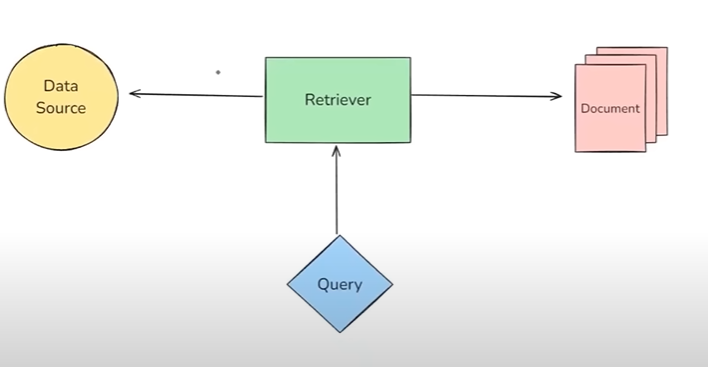

#### Wikipedia Retriever


A Wikipedia Retriever is a retriever that can fetch information from Wikipedia. It can be used to retrieve information about a specific topic, such as a person, place, or thing. The retriever can also be used to retrieve information about a specific Wikipedia page, such as the page's title, content, and history.

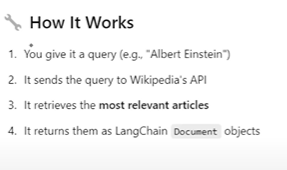

In [71]:
# %pip install wikipedia
from langchain_community.retrievers import WikipediaRetriever
# Initialize the WikipediaRetriever
wikipedia_retriever = WikipediaRetriever(
    top_k=2,  # Number of top articles to retrieve
    language="en"  # Language of the articles
)

# Example query to search Wikipedia
query = "What is the Indian Premier League?"

# Retrieve articles related to the query
articles = wikipedia_retriever.invoke(query)

# Print the retrieved articles
for i, article in enumerate(articles):
    print(f"Article {i + 1}:")
    # print(f"Title: {article.title}")
    print(f"Content: {article.page_content}...")
    # print(f"URL: {article.metadata['url']}")
    print("-" * 30)


Article 1:
Content: The 2024 Indian Premier League (also known as IPL 17 and branded as TATA IPL 2024) was the 17th edition of the Indian Premier League. The tournament featured ten teams competing in 74 matches from 22 March to 26 May 2024. It was held across 13 cities in India, with Chennai hosting the opening ceremony and the final as the defending champions.
In the final, Kolkata Knight Riders defeated Sunrisers Hyderabad by 8 wickets to win their third IPL title.


== Background ==
The Indian Premier League is a franchise Twenty20 cricket league held in India, organized by the Board of Control for Cricket in India. It is held annually since the first edition in 2008. Chennai Super Kings were the defending champions, having won their fifth title in the previous season after beating Gujarat Titans in the final.


=== Format ===
The format returned to the same as 2022, unlike 2023, with the group order being re-shuffled. Each team played twice against the teams in their group and the

#### Vector Store Retriever


A Vector Store Retriever in LangChain is the most common type of retriever that lets you search and fetch documents from a vectore store based on the semantic similarity using vector embeddings.

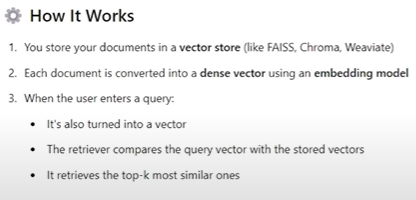

In [5]:
from langchain_core.documents import Document
from langchain_openai import OpenAIEmbeddings
from langchain.vectorstores import Chroma

# Step 1: Create a LangChain Document
documents = [
    Document(page_content="LangChain helps developers build LLM applications easily."),
    Document(page_content="Chroma is a vector database optimized for LLM-based search."),
    Document(page_content="Embeddings convert text into high-dimensional vectors."),
    Document(page_content="OpenAI provides powerful embedding models."),
]

# Step 2: Initialize the Embedding model

embeddings = OpenAIEmbeddings()

# Step 3: Create a Chroma vector store
vector_store = Chroma.from_documents(
    documents=documents,
    embedding=embeddings,
    collection_name="langchain_docs" # Directory to store the vector database
)

# Step 4: Convert VectoreStore into a retriever
retriever = vector_store.as_retriever(search_kwargs={"k": 2})

# Step 5: Use the retriever to find relevant documents
query = "What is Chroma used for??"
results = retriever.invoke(query)

# Print the retrieved documents
for i, result in enumerate(results):
    print(f"Result {i + 1}:")
    print(f"Content: {result.page_content}")
    # print(f"Metadata: {result.metadata}")
    print("-" * 30)

Result 1:
Content: Chroma is a vector database optimized for LLM-based search.
------------------------------
Result 2:
Content: Chroma is a vector database optimized for LLM-based search.
------------------------------


#### Maximum Marginal Relevance (MMR)

"How can we pick results that are not only relavant to the query but also different from each other?"

MMR is an information retrieval algorithm designed to reduce redundancy in the retrieved results while maintaining their relevance to the query. It works by selecting the most relevant documents and then iteratively selecting the next most relevant document that is different from the previously selected documents.

<!-- **Why MMR Retriever?** -->


In [6]:
# Sample documents
docs = [
    Document(page_content="LangChain makes it easy to work with LLMs."),
    Document(page_content="LangChain is used to build LLM based applications."),
    Document(page_content="Chroma is used to store and search document embeddings."),
    Document(page_content="Embeddings are vector representations of text."),
    Document(page_content="MMR helps you get diverse results when doing similarity search."),
    Document(page_content="LangChain supports Chroma, FAISS, Pinecone, and more."),
]

In [8]:
%pip install faiss-cpu

from langchain_community.vectorstores import FAISS

# Step 1: Intialize the Embedding model
embeddings = OpenAIEmbeddings()

# Step 2: Create a FAISS vector store
vector_store = FAISS.from_documents(
    documents=docs,
    embedding=embeddings)

# Step 3: Convert VectoreStore into a retriever
retriever = vector_store.as_retriever(
    search_type="mmr",  # Use MMR for diverse results
    search_kwargs={"k": 3, "lambda_mult": 0.5}  # Set k and lambda_mult for MMR, where lambda_mult controls diversity. lambda_mult = 0.5 means the results will be a mix of relevance and diversity. A value of 1.0 means only relevance, while 0.0 means only diversity.
)

# Step 4: Use the retriever to find relevant documents
query = "What is LangChain used for?"
results = retriever.invoke(query)

# Print the retrieved documents
for i, result in enumerate(results):
    print(f"Result {i + 1}:")
    print(f"Content: {result.page_content}")
    # print(f"Metadata: {result.metadata}")
    print("-" * 30)

The value specified in an AutoRun registry key could not be parsed.

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
   ---------------------------------------- 0.0/15.0 MB ? eta -:--:--
   --------- ------------------------------ 3.4/15.0 MB 20.0 MB/s eta 0:00:01
   -------------------- ------------------- 7.9/15.0 MB 20.3 MB/s eta 0:00:01
   -------------------------------- ------- 12.3/15.0 MB 20.8 MB/s eta 0:00:01
   ---------------------------------------- 15.0/15.0 MB 20.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.
Result 1:
Content: LangChain is used to build LLM based applications.
------------------------------
Result 2:
Content: Chroma is used to store and search document embeddings.
------------------------------
Result 3:
Content: LangChain supports Chroma, FAISS, Pinecone, and more.
------------------------------


#### Multi-Query Retriver

Distance-based vector database retrieval embeds (represents) queries in high-dimensional space and finds similar embedded documents based on a distance metric. But, retrieval may produce different results with subtle changes in query wording, or if the embeddings do not capture the semantics of the data well. Prompt engineering / tuning is sometimes done to manually address these problems, but can be tedious.

The `MultiQueryRetriever` automates the process of prompt tuning by using an LLM to generate multiple queries from different perspectives for a given user input query. For each query, it retrieves a set of relevant documents and takes the unique union across all queries to get a larger set of potentially relevant documents. By generating multiple perspectives on the same question, the MultiQueryRetriever can mitigate some of the limitations of the distance-based retrieval and get a richer set of results

In [10]:
from langchain_community.vectorstores import FAISS
from langchain_openai import OpenAIEmbeddings
from langchain_core.documents import Document
from langchain_openai import ChatOpenAI
from langchain.retrievers.multi_query import MultiQueryRetriever

# Step 1: Create health & wellness documents
all_docs = [
    Document(page_content="Regular walking boosts heart health and can reduce symptoms of depression.", metadata={"source": "H1"}),
    Document(page_content="Consuming leafy greens and fruits helps detox the body and improve longevity.", metadata={"source": "H2"}),
    Document(page_content="Deep sleep is crucial for cellular repair and emotional regulation.", metadata={"source": "H3"}),
    Document(page_content="Mindfulness and controlled breathing lower cortisol and improve mental clarity.", metadata={"source": "H4"}),
    Document(page_content="Drinking sufficient water throughout the day helps maintain metabolism and energy.", metadata={"source": "H5"}),
    Document(page_content="The solar energy system in modern homes helps balance electricity demand.", metadata={"source": "I1"}),
    Document(page_content="Python balances readability with power, making it a popular system design language.", metadata={"source": "I2"}),
    Document(page_content="Photosynthesis enables plants to produce energy by converting sunlight.", metadata={"source": "I3"}),
    Document(page_content="The 2022 FIFA World Cup was held in Qatar and drew global energy and excitement.", metadata={"source": "I4"}),
    Document(page_content="Black holes bend spacetime and store immense gravitational energy.", metadata={"source": "I5"}),
]

# Step 2: Initialize the Embedding model
embeddings = OpenAIEmbeddings()

# Step 3: Create a FAISS vector store
vector_store = FAISS.from_documents(
    documents=all_docs,
    embedding=embeddings
)

#Step 4a: Createw a Similarity based Retriever
similarity_retriever = vector_store.as_retriever(search_kwargs={"k": 5})

# Step 4b: Create a MultiQueryRetriever
retriever = MultiQueryRetriever.from_llm(
    retriever=vector_store.as_retriever(search_kwargs={"k": 5}),
    llm=ChatOpenAI(model="gpt-3.5-turbo")
)

# Step 5: Use the retriever to find relevant documents
query = "How to improve energy levels and maintain balance?"

# Using the retrievers
similarity_results = similarity_retriever.invoke(query)
multi_query_results = retriever.invoke(query)

# Print the retrieved documents from similarity retriever
print("Results from Similarity Retriever:")
for i, result in enumerate(similarity_results):
    print(f"Result {i + 1}:")
    print(f"Content: {result.page_content}")
    print(f"Metadata: {result.metadata}")
    print("-" * 30)

# Print the retrieved documents from MultiQueryRetriever
print("Results from MultiQuery Retriever:")
for i, result in enumerate(multi_query_results):
    print(f"Result {i + 1}:")
    print(f"Content: {result.page_content}")
    print(f"Metadata: {result.metadata}")
    print("-" * 30)

Results from Similarity Retriever:
Result 1:
Content: Drinking sufficient water throughout the day helps maintain metabolism and energy.
Metadata: {'source': 'H5'}
------------------------------
Result 2:
Content: Mindfulness and controlled breathing lower cortisol and improve mental clarity.
Metadata: {'source': 'H4'}
------------------------------
Result 3:
Content: Regular walking boosts heart health and can reduce symptoms of depression.
Metadata: {'source': 'H1'}
------------------------------
Result 4:
Content: Deep sleep is crucial for cellular repair and emotional regulation.
Metadata: {'source': 'H3'}
------------------------------
Result 5:
Content: The solar energy system in modern homes helps balance electricity demand.
Metadata: {'source': 'I1'}
------------------------------
Results from MultiQuery Retriever:
Result 1:
Content: Drinking sufficient water throughout the day helps maintain metabolism and energy.
Metadata: {'source': 'H5'}
------------------------------
Resul

#### Contextual Compression Retriever


One challenge with `retrieval` is that usually you don't know the specific queries your document storage system will face when you ingest data into the system. This means that the information most relevant to a query may be buried in a document with a lot of irrelevant text. Passing that full document through your application can lead to more expensive LLM calls and poorer responses.

`Contextual compression` is meant to fix this. The idea is simple: instead of immediately returning retrieved documents as-is, you can compress them using the context of the given query, so that only the relevant information is returned. “Compressing” here refers to both compressing the contents of an individual document and filtering out documents wholesale.

To use the Contextual Compression Retriever, you'll need:

- a base retriever
- a Document Compressor

The Contextual Compression Retriever passes queries to the base retriever, takes the initial documents and passes them through the Document Compressor. The Document Compressor takes a list of documents and shortens it by reducing the contents of documents or dropping documents altogether.

In [12]:
from langchain_community.vectorstores import FAISS
from langchain_openai import OpenAIEmbeddings, ChatOpenAI
from langchain_core.documents import Document
from langchain.retrievers.contextual_compression import ContextualCompressionRetriever
from langchain.retrievers.document_compressors import LLMChainExtractor

# Step 1: Recreate the document objects from the previous data
docs = [
    Document(page_content=(
        """The Grand Canyon is one of the most visited natural wonders in the world.
        Photosynthesis is the process by which green plants convert sunlight into energy.
        Millions of tourists travel to see it every year. The rocks date back millions of years."""
    ), metadata={"source": "Doc1"}),

    Document(page_content=(
        """In medieval Europe, castles were built primarily for defense.
        The chlorophyll in plant cells captures sunlight during photosynthesis.
        Knights wore armor made of metal. Siege weapons were often used to breach castle walls."""
    ), metadata={"source": "Doc2"}),

    Document(page_content=(
        """Basketball was invented by Dr. James Naismith in the late 19th century.
        It was originally played with a soccer ball and peach baskets. NBA is now a global league."""
    ), metadata={"source": "Doc3"}),

    Document(page_content=(
        """The history of cinema began in the late 1800s. Silent films were the earliest form.
        Thomas Edison was among the pioneers. Photosynthesis does not occur in animal cells.
        Modern filmmaking involves complex CGI and sound design."""
    ), metadata={"source": "Doc4"})
]

# Step 2: Initialize the OpenAI Embeddings model
embeddings = OpenAIEmbeddings()

# Step 3: Create a FAISS vector store
vector_store = FAISS.from_documents(
    documents=docs,
    embedding=embeddings
)

# Step 4: Create a ContextualCompressionRetriever
compressor = LLMChainExtractor.from_llm(
    llm=ChatOpenAI(model="gpt-3.5-turbo")
)   

retriever = ContextualCompressionRetriever(
    base_compressor=compressor,
    base_retriever=vector_store.as_retriever(search_kwargs={"k": 5})  # Retrieve top 5 documents 
)

# Step 5: Use the retriever to find relevant documents
query = "What is photosynthesis?"
results = retriever.invoke(query)

# Print the retrieved documents
print("Results from Contextual Compression Retriever:")
for i, result in enumerate(results):
    print(f"Result {i + 1}:")
    print(f"Content: {result.page_content}")
    print(f"Metadata: {result.metadata}")
    print("-" * 30)



Results from Contextual Compression Retriever:
Result 1:
Content: Photosynthesis is the process by which green plants convert sunlight into energy.
Metadata: {'source': 'Doc1'}
------------------------------
Result 2:
Content: The chlorophyll in plant cells captures sunlight during photosynthesis.
Metadata: {'source': 'Doc2'}
------------------------------


#### More Retrievers

- BM25Retriever
- ParentDocumentRetriever
- SelfQueryRetriever
- MultiVectorRetriever
- TimeWeightedVectorRetriever
- EnsembleRetriever
- ArxivRetriever

https://python.langchain.com/docs/integrations/retrievers/

### What is RAG?

Normal LLMs may struggle to answer queries related to specific domains, recent information, or may hallucinate. LLM Fine-tuning (by updating the model weights) is one option to address these issues, though it is a computationally expensive process, and the model's performance may degrade if the fine-tuning is not done carefully.

We can utilize `In-Context Learning`, which leverages the core capability of LLMs: the model learns to solve a task purely by seeing examples in the prompt without updating its weights. And this is called `Few Shot Learning`.

Instead of just example tasks, retrieve `background informations`, `facts`, `documents`, etc., and inject that into the prompt to augment the model's knowledge. This is precisely called `Retrieval Augmented Generation`.

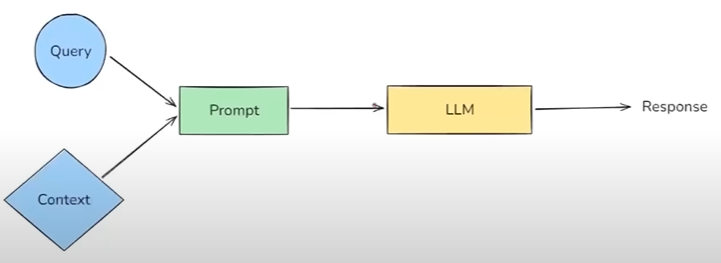


#### Understanding RAG

**`Indexing`**: Creation of Knowledge-base by embedding the documents in a vector space. This is done by using a pre-trained language model. The model is fine-tuned to the specific task of document embedding. The output is a vector representation of the document.
    
`Steps`:
-  Document Ingestion

    <!-- 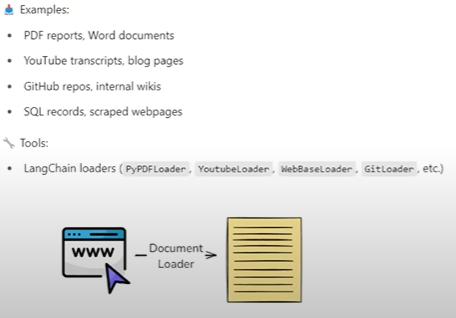 -->

- Text Chunking

   <!-- 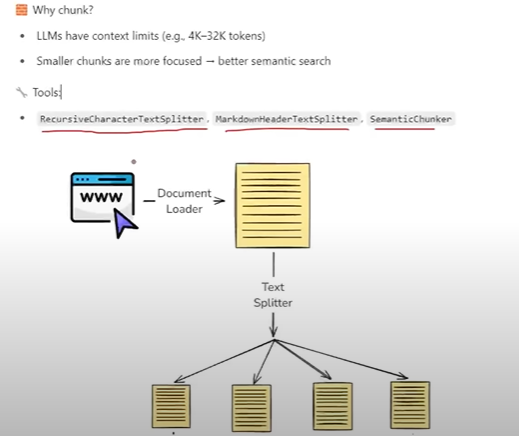 -->

- Embedding Generation

  <!-- 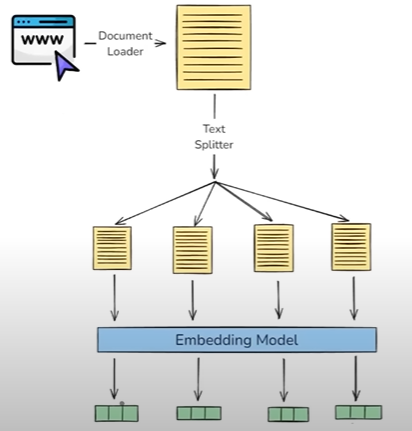 -->

- Storage in Vectore Store


**`Retrieval`**: This is the process where relevant documents are retrieved based on the user query. The vector representation of the document is used to search for similar documents in the knowledge-base. This is done using a similarity metric such as cosine similarity. The output is a list of relevant documents. 

**`Augmentation`**: This is the process where the retrieved documents are combined with the user's query to form a new, enriched prompt. 

**`Generation`**: This is the process where the augmented documents are used to generate the final response. This is done using a pre-trained language model. 

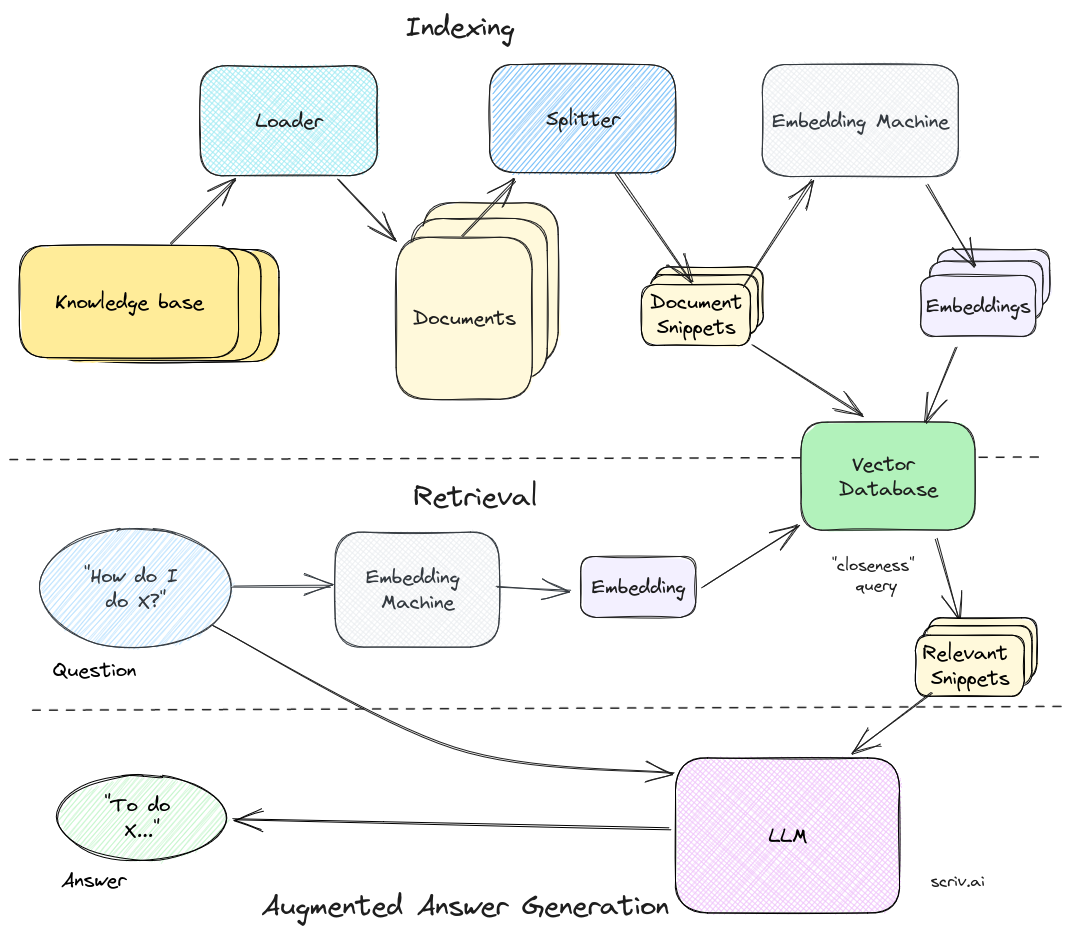
